# Step 4: Evaluating a model

In [1]:
# Importing Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Import Boston Housing Dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# Import Heart Disease Dataset
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# features (X) and labels (y)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit model
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Three ways to evaluate scikit-learn models/estimators:
1. Estimator `'score'` method
2. The `'scoring'` parameter
3. Problem specific metric functions

# 1. Evaluating the model with `'score'` method

In [7]:
clf.score(X_test, y_test)

0.8524590163934426

#### Let's try this with regressor model/estimator...

In [8]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# features (X) and labels (y)
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# initiate model
model = RandomForestRegressor(n_estimators=100)

# fit model/estimator
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [9]:
model.score(X_test, y_test)

0.8476644039421872

#### Note:
`'score'` returns:
1. **For Classifier:**
    Returns the mean accuracy on the given test data and labels.
2. **For Regressor:**
    Returns the coefficient of determination R^2 of the prediction.

# 2. Evaluating the model using `'scoring'` parameter

In [10]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# features (X) and labels (y)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit model
clf.fit(X_train, y_train);

#### Cross Validation Score

<img src='../images/sklearn-cross-validation.png' width=850/>

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
clf.score(X_test, y_test)

0.8524590163934426

In [13]:
cross_val_score(clf, X, y, cv=3)                               # 3-fold Cross Validation Score

array([0.82178218, 0.84158416, 0.78217822])

In [14]:
cross_val_score(clf, X, y, cv=5)                               # 5-fold Cross Validation Score

array([0.81967213, 0.8852459 , 0.7704918 , 0.8       , 0.75      ])

In [15]:
cross_val_score(clf, X, y, cv=10)                              # 10-fold Cross Validation Score

array([0.90322581, 0.80645161, 0.83870968, 0.90322581, 0.90322581,
       0.8       , 0.73333333, 0.86666667, 0.72413793, 0.79310345])

#### Compare 'score' with 'cross_val_score'

In [16]:
np.random.seed(42)

# Single training and test score
clf_single_score = clf.score(X_test, y_test)

# Mean of 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

In [17]:
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

#### Scoring parameter set to 'None' by default

In [18]:
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

#### If scoring = None, then
1. Default scoring parameter of classifier = Mean Accuracy
2. Default scoring parameter of regressor = R^2

## 2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report

### 2.1.1 Accuracy

In [19]:
# features (X) and label (y)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Random State
np.random.seed(42)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# initiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# fit model
clf.fit(X_train, y_train);

In [20]:
clf_cross_val_score = cross_val_score(clf, X, y, cv=5)
np.mean(clf_cross_val_score)

0.811639344262295

In [21]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(clf_cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 81.16%


### 2.1.2 Area under the Reciever Operating Characteristic curve (AUC / ROC)
* Area Under Curve (AUC)
* ROC Curve

ROC curves are a comparison of a model's True Positive Rate (TPR) versus a model's False Positive Rate (FPR).
* True Positive = model predicts 1 when truth is 1
* False Positive = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* False Negative = model predicts 0 when truth is 1

#### ROC Curve

In [22]:
from sklearn.metrics import roc_curve

# make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Probability of [0, 1]
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

Probabitity of [0, 1]
* 0 is Negative Class
* 1 is Positive Class

In [23]:
# ROC curve only observe Positive Class
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53, 0.74,
       0.3 , 0.89, 0.05, 0.97, 0.98, 0.99, 0.16, 0.05, 0.02, 0.49, 0.11,
       0.62, 0.71, 0.74, 0.66, 0.8 , 0.78, 0.17, 0.85, 0.06, 0.08, 0.04,
       0.38, 0.54, 0.11, 0.56, 0.84, 0.67, 0.92, 0.87, 0.83, 0.82, 0.62,
       0.68, 0.23, 0.61, 1.  , 0.17, 0.03, 0.15, 0.2 , 0.75, 0.75, 0.13,
       0.07, 0.29, 0.99, 0.13, 0.  , 0.14])

In [24]:
# Calculate FPR, TPR and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)            # (y_true, y_positive_predict)

In [25]:
# Check the FPR
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [26]:
# Check the TPR
tpr

array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
       0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
       0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
       0.96875, 1.     , 1.     , 1.     ])

#### Create a function for plotting ROC curves

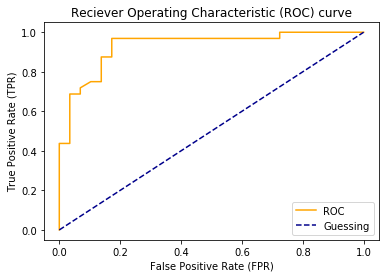

In [27]:
def plot_roc_curves(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) 
    and the true positive rate (tpr) of a model.
    """
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Labels and Title
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Reciever Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curves(fpr, tpr)

#### Area Under Curve (AUC)

It is the amount of area of plot covered by the curve (yellow line).

In [28]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

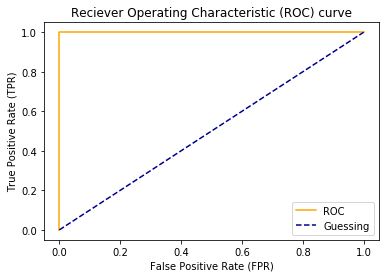

In [29]:
# Try to plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curves(fpr, tpr)

In [30]:
# Perfect AUC score / maximum score
roc_auc_score(y_test, y_test)

1.0

### 2.1.3 Confusion Matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving us an idea of where the model is getting confused.

In [31]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [32]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds,
            rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


* True Negative = 24
* False Negative = 4
* False Positive = 5
* True Positive = 28

In [33]:
24 + 3 + 8 + 26

61

In [34]:
len(X_test)

61

Text(0.5, 1, 'Confusion Matrix')

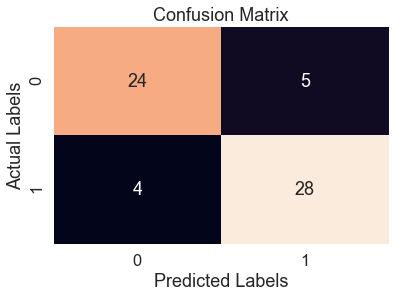

In [35]:
# Make confusion matrix more visual with seaborn's heatmap

# set font scale and style
sns.set(font_scale=1.5, style="darkgrid")

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Heatmap
sns.heatmap(conf_mat, annot=True, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")

#### Create a function for plotting Confusion Matrix with Seaborn's heatmap

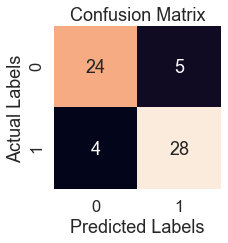

In [36]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, annot=True, cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title("Confusion Matrix")

plot_conf_mat(conf_mat)

### 2.1.4 Classification Report

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Each term measures something slightly different:
* **Precision** - Indicates the proportion of positive identifications (model predicted class `1`) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

**Example:** Where precision and recall become valuable

In [45]:
disease_true = np.zeros(10000)                       # 10000 samples
disease_true[0] = 1                                # only one positive case out of 10000

disease_preds = np.zeros(10000)                   # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds, 
                                   output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## 2.2 Regression model evaluation metrics

1. R^2 (r-squared) or coefficient of determination
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

### 2.2.1 R^2 (r-squared) or coefficient of determination
* It compares our models predictions to the mean of targets.
* Values can range from negative infinity (a very poor model) to 1.
* For example, if all our model does is predict the mean of the targets, it's R^2 value would be 0. And if our model perfectly predicts a range of numbers it's R^2 value would be 1.

In [59]:
# Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# X and y
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# initiate model
model = RandomForestRegressor(n_estimators=100)

# fit model
model.fit(X_train, y_train);

# predictions
y_preds = model.predict(X_test)

In [60]:
model.score(X_test, y_test)                   # It will return R^2 for regression model

0.873969014117403

In [64]:
# Another way
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())           # Every value inside it will be same which is mean of y_test

In [72]:
y_test.mean()                                              # Every value in y_test_mean is equal to y_test.mean()

21.488235294117654

#### If all our model does is predict the mean of the targets, it's R^2 value would be 0.

In [65]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

r2_score(y_test, y_test_mean) outputing that very low number (2.220446049250313e-16) is okay.

That number is actually very close to 0.

But it's not exactly 0, because of the way computer calculate numbers (limited precision).

For more information, https://en.wikipedia.org/wiki/Precision_(computer_science)

#### If our model perfectly predicts a range of numbers it's R^2 value would be 1.

In [69]:
r2_score(y_test, y_test)

1.0

#### Actual Score

In [70]:
r2_score(y_test, y_preds)

0.8739690141174031

In [71]:
model.score(X_test, y_test)

0.873969014117403

### 2.2.2 Mean Absolute Error (MAE)
The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

In [73]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

In [75]:
# Visualize the difference with dataframe
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753


### 2.2.3 Mean Squared Error (MSE)
The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

In [77]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

9.242328990196082

In [81]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

9.24232899019608

MSE will always be higher than MAE because is squares the errors rather than only taking the absolute difference into account.

Now you might be thinking, which regression evaluation metric should you use?

* R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R^2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
* MAE gives a better indication of how far off each of your model's predictions are on average.
* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are). 
    * Pay more attention to MAE: When being \$10,000 off is ***twice*** as bad as being \$5,000 off.
    * Pay more attention to MSE: When being \$10,000 off is ***more than twice*** as bad as being \$5,000 off.

Note: **Minimize MAE and MSE while maximizing R^2.**

## 2.3 Finally using the `'scoring'` parameter

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

### Accuracy:
By default cross validation score returns accuracy if `'scoring=None'` on Classifier Model.

In [95]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [96]:
# cross validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [97]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


### Precision:

In [101]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.83333333, 0.90625   , 0.81818182, 0.82857143, 0.725     ])

In [104]:
np.mean(cv_precision)

0.8222673160173161

### Recall:

In [105]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.90909091, 0.87878788, 0.72727273, 0.78787879, 0.87878788])

In [106]:
np.mean(cv_recall)

0.8363636363636363

### F1-score:

In [107]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1

array([0.85294118, 0.89230769, 0.84848485, 0.80597015, 0.80555556])

In [108]:
np.mean(cv_f1)

0.8410518844144832

#### How about our Regression model...

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor(n_estimators=100)

### R^2:
By default cross validation score returns R^2 if `'scoring=None'` on Regressor Model.

In [118]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
np.mean(cv_r2)

0.622375083951403

In [119]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
np.mean(cv_r2)

0.622375083951403

### MAE:

In [122]:
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.06211765, -2.5060396 , -3.35824752, -3.81479208, -3.20442574])

In [123]:
np.mean(cv_mae)

-2.9891245195107743

Why the `"neg_"`?

Because Scikit-Learn documentation states:
> ["All scorer objects follow the convention that higher return values are better than lower return values."](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)

Which in this case, means a lower negative value (closer to 0) is better.

### MSE:

In [124]:
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([ -7.39124675, -12.80369927, -21.44045174, -46.88481495,
       -19.38141243])

In [125]:
np.mean(cv_mse)

-21.580325026247316

# 3. Problem specific metric functions

#### Classification Evaluation Functions

In [129]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test, y_preds):.2f}")
print(f"Recall Score: {recall_score(y_test, y_preds):.2f}")
print(f"F1 Score: {f1_score(y_test, y_preds):.2f}")

Accuracy Score: 77.05%
Precision Score: 0.73
Recall Score: 0.87
F1 Score: 0.79


#### Regression Evaluation Functions

In [131]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print(f"R^2 Score: {r2_score(y_test, y_preds)*100:.2f}%")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_preds):.2f}")

R^2 Score: 89.20%
Mean Absolute Error: 2.15
Mean Squared Error: 9.34
